In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

/Users/austen/anaconda/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [5]:
x = np.linspace(-1,1,50)

<IPython.core.display.Javascript object>


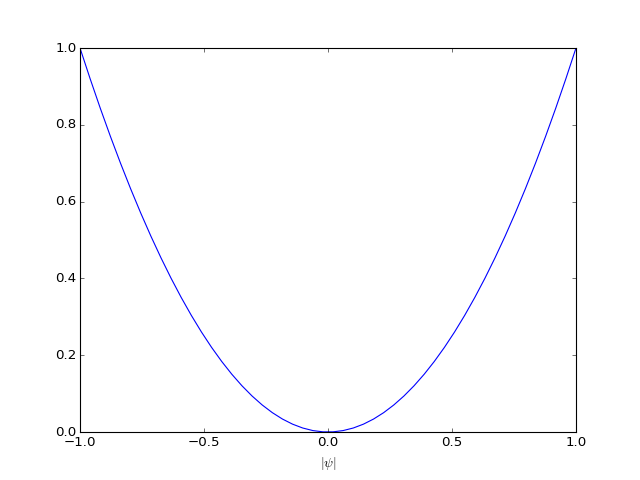

In [6]:
plt.plot(x, x**2, label = 'x1')
plt.xlabel('$|\psi|$')
plt.ylabel('$\rho$')